In [7]:
#!/usr/bin/env python3
import numpy as np

samples_and = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 1],
]


samples_or = [
    [0, 0, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
]


samples_xor = [
    [0, 0, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 0],
]



def perceptron(samples):
    
    '''
    w: 初始化shape为2*1的权重系数的向量
    b: 初始化bias
    a: 固定学习率
    '''
    w = np.array([1, 2])
    b = 0
    a = 1

    for i in range(10):
        for j in range(4):
            '''
            x: 取参数每行的前两位作为输入
            y: 经过阶跃激活函数激活后的输出，y=w*x+b
            d: 取参数每行最后一位数字作为真实值
            '''
            x = np.array(samples[j][:2])
            y = 1 if np.dot(w, x) + b > 0 else 0
            d = np.array(samples[j][2])
            '''
            d-y = d-w*x-b，则损失函数为loss=1/2(d-y)^2
            delta_b: 对损失函数的b求偏导
            delta_w: 对损失函数的w向量求偏导
            '''
            delta_b = a*(d-y)*(-1)
            delta_w = a*(d-y)*(-x)

            print('epoch {} sample {}  [w[0]={} w[1]={} b={} d={} y={} delta_w[0]={} delta_w[1]={} delta_b={}]'.format(
                i+1, j+1, w[0], w[1], b, d, y, delta_w[0], delta_w[1], delta_b
            ))
            '''
            对系数w和偏置b进行梯度下降运算
            '''
            w = w - delta_w
            b = b - delta_b


if __name__ == '__main__':
    print('logical and')
    perceptron(samples_and)
    print('logical or')
    perceptron(samples_or)
    print('logical xor')
    perceptron(samples_xor)


logical and
epoch 1 sample 1  [w[0]=1 w[1]=2 b=0 d=0 y=0 delta_w[0]=0 delta_w[1]=0 delta_b=0]
epoch 1 sample 2  [w[0]=1 w[1]=2 b=0 d=0 y=1 delta_w[0]=1 delta_w[1]=0 delta_b=1]
epoch 1 sample 3  [w[0]=0 w[1]=2 b=-1 d=0 y=1 delta_w[0]=0 delta_w[1]=1 delta_b=1]
epoch 1 sample 4  [w[0]=0 w[1]=1 b=-2 d=1 y=0 delta_w[0]=-1 delta_w[1]=-1 delta_b=-1]
epoch 2 sample 1  [w[0]=1 w[1]=2 b=-1 d=0 y=0 delta_w[0]=0 delta_w[1]=0 delta_b=0]
epoch 2 sample 2  [w[0]=1 w[1]=2 b=-1 d=0 y=0 delta_w[0]=0 delta_w[1]=0 delta_b=0]
epoch 2 sample 3  [w[0]=1 w[1]=2 b=-1 d=0 y=1 delta_w[0]=0 delta_w[1]=1 delta_b=1]
epoch 2 sample 4  [w[0]=1 w[1]=1 b=-2 d=1 y=0 delta_w[0]=-1 delta_w[1]=-1 delta_b=-1]
epoch 3 sample 1  [w[0]=2 w[1]=2 b=-1 d=0 y=0 delta_w[0]=0 delta_w[1]=0 delta_b=0]
epoch 3 sample 2  [w[0]=2 w[1]=2 b=-1 d=0 y=1 delta_w[0]=1 delta_w[1]=0 delta_b=1]
epoch 3 sample 3  [w[0]=1 w[1]=2 b=-2 d=0 y=0 delta_w[0]=0 delta_w[1]=0 delta_b=0]
epoch 3 sample 4  [w[0]=1 w[1]=2 b=-2 d=1 y=1 delta_w[0]=0 delta_w[1]=0

传统感知器的作用是在一个（超）平面中，通过一条直线进行划分，即可根据直线的两边进行输出值的分类，所以单个感知器可进行简单的逻辑判断（与或非）  
异或(xor)的问题在于单凭一条直线无法对当前的平面进行正确划分，所以至少需要两个感知器组成单隐层结构，先对输入进行两次运算，形成两条直线，进而划分出一个区域（中间地带），才能完成正确的输出
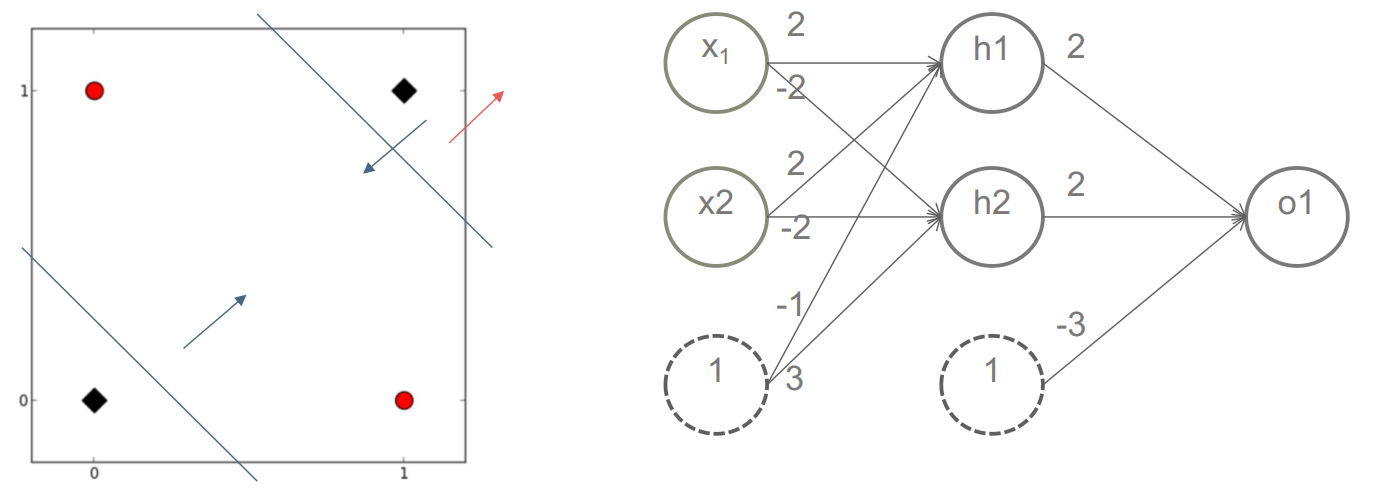